## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**My goal is to complete a few tasks below based off the 538 article and see if I can reach a similar conclusion. I use pandas and my visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

**Source Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.


In [1]:
#Importing all libraries required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if my analysis agrees with the article's conclusion.


In [3]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Now, Let's explore the relationship between popularity of a film and its rating. We create a scatterplot showing the relationship between rating and votes.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

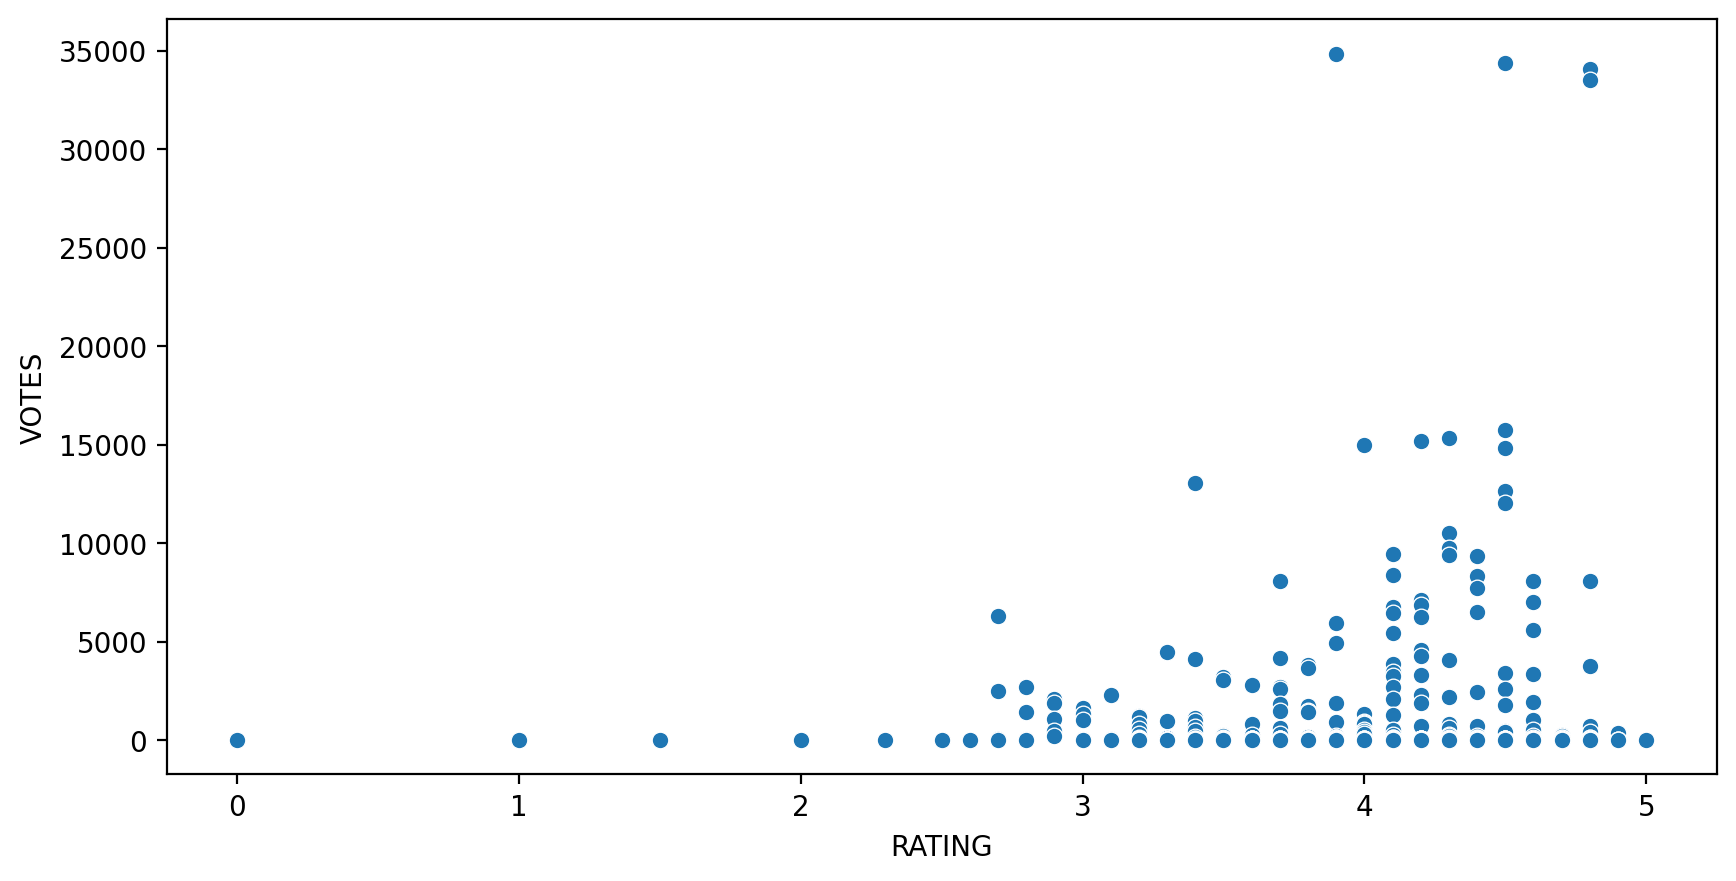

In [6]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

**Now, we calculate the correlation between the columns:**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**We create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [9]:
fandango['YEAR']=fandango['FILM'].str.extract(r'(\(+[0-9]+\))') 
#There are several ways to do this, I have used a regular expression to strip the year from the dataset.
fandango['YEAR']

0      (2015)
1      (2015)
2      (2015)
3      (2015)
4      (2015)
        ...  
499    (2015)
500    (2015)
501    (2015)
502    (1964)
503    (2012)
Name: YEAR, Length: 504, dtype: object

**Next, we visualize the count of movies per year with a plot:**

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

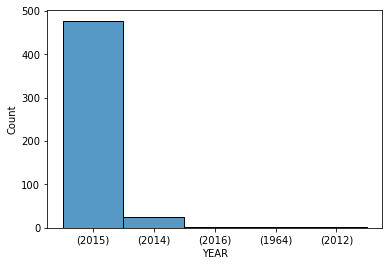

In [10]:
sns.histplot(data=fandango,x='YEAR')

**Let us analyse the top 10 movies that received the most number of votes:**

In [11]:
fandango.nlargest(10,('VOTES'))

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,(2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,(2015)
7,Minions (2015),4.0,4.0,14998,(2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,(2015)
9,Into the Woods (2014),3.5,3.4,13055,(2014)


**Let us see how many of the movies in the dataset have zero votes and drop them from the dataset.**

In [12]:
reviewed_films = fandango[(fandango['VOTES']>0)]